# K-means Clustering: A Step-by-Step Guide


In [ ]:
# Step 1: Load the necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 2: Load and preprocess the data
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
# Convert the data into a pandas DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

In [ ]:
df.shape

(150, 5)

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


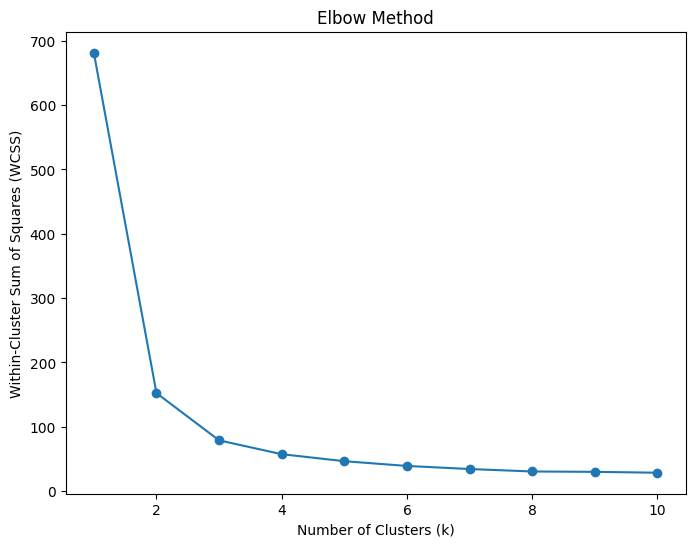

In [ ]:
# Step 3: Determine the optimal number of clusters
# Before applying the K-means algorithm, it's crucial to determine the optimal number of clusters (k) that best represents the underlying structure of the data. We will use the elbow method and silhouette analysis to find the optimal k.

# The elbow method plots the within-cluster sum of squares (WCSS) against the number of clusters. The optimal k is the point where the rate of decrease in WCSS slows down significantly, forming an elbow-like shape.
wcss = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, wcss, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method')
plt.show()

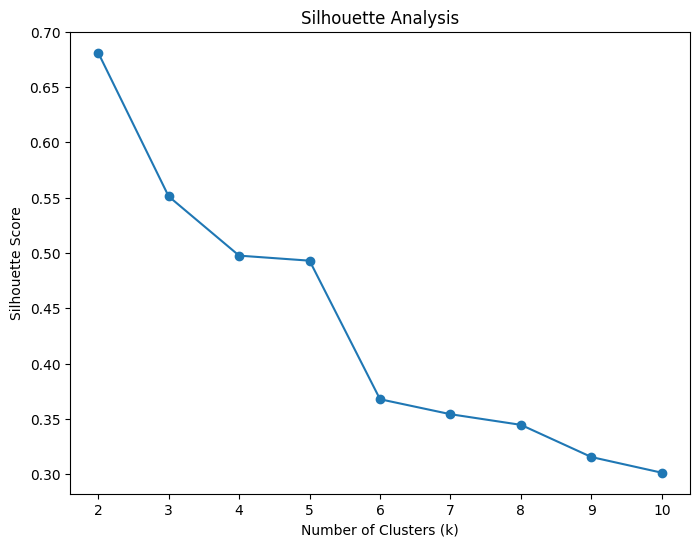

In [ ]:
# Silhouette analysis measures the quality of clustering by considering both the compactness of clusters and the separation between them. The silhouette score ranges from -1 to 1, with higher values indicating better-defined clusters.
silhouette_scores = []

for k in k_range[1:]:  # Start from k=2
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))

plt.figure(figsize=(8, 6))
plt.plot(k_range[1:], silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

Based on the elbow method and silhouette analysis, we can choose the optimal number of clusters (k) for the Iris dataset. In this case, k=2 seems to be a reasonable choice.


In [ ]:
# Step 4: Perform K-means clustering with scikit-learn
# Now that we have determined the optimal number of clusters, we can apply the K-means algorithm using the scikit-learn library.
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

In [ ]:
# Step 5: Evaluate the clustering performance
# To assess the quality of the clustering results, we can use evaluation metrics such as the silhouette score.
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette score: {silhouette_avg:.3f}")

Silhouette score: 0.681


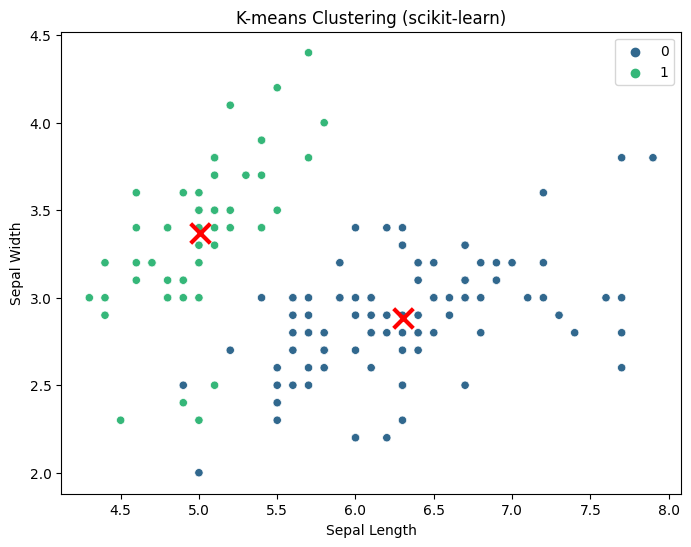

In [ ]:
# Step 6: Visualization and Interpretation
# Visualizing the clustering results can provide valuable insights into the structure of the data and the relationships between different clusters.

# Create a scatter plot to visualize the clustering results in two dimensions (e.g., sepal length vs. sepal width).
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-means Clustering (scikit-learn)')
plt.show()

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


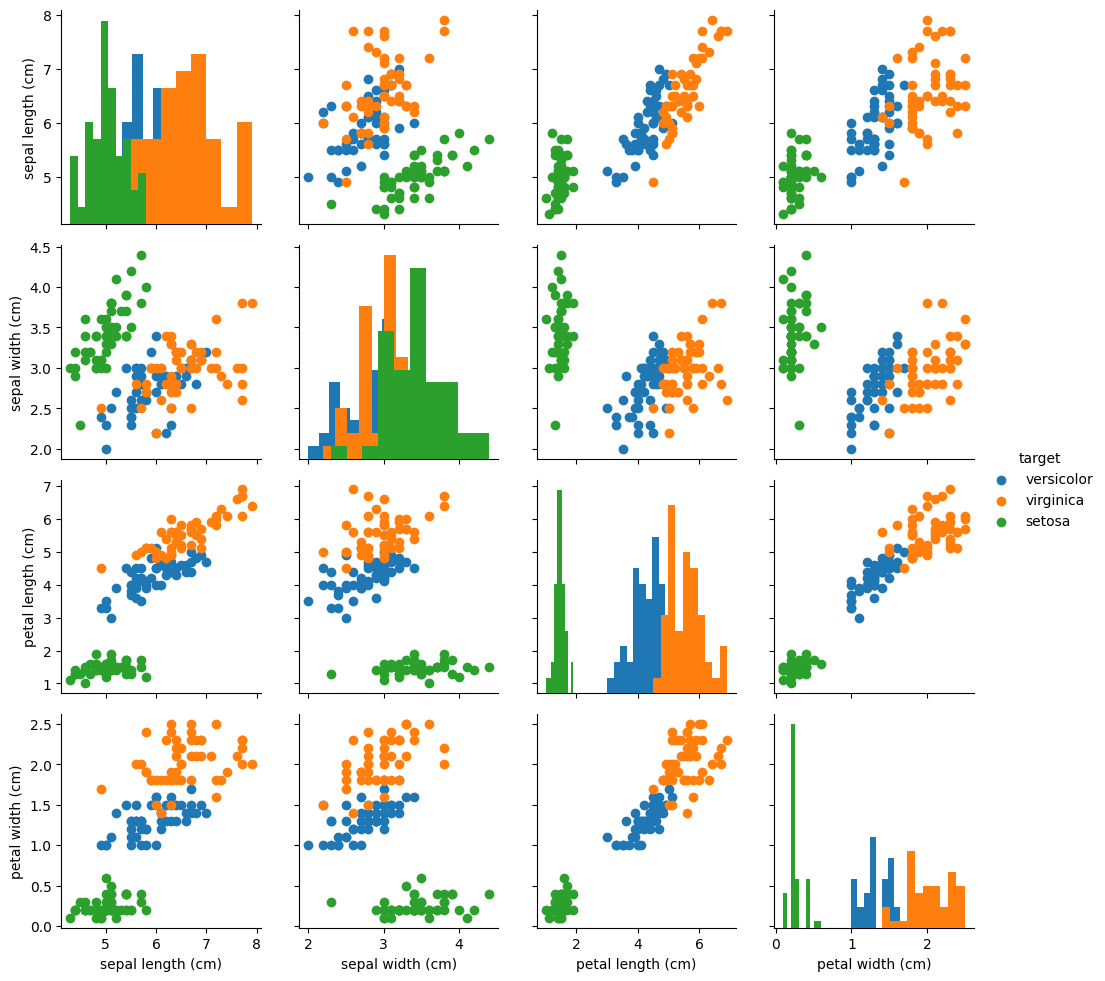

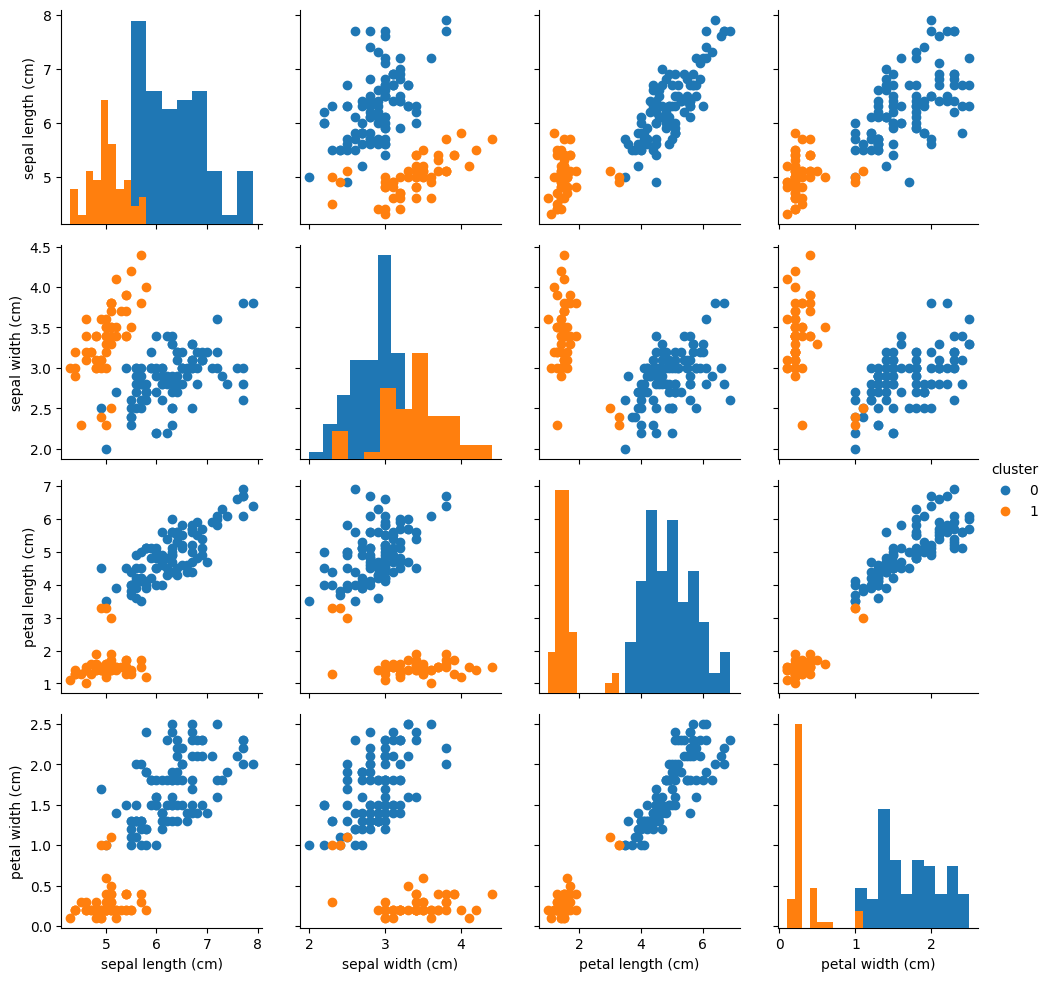

In [ ]:
# Create a copy of the DataFrame with the cluster labels
df_clusters = df.copy()
df_clusters['cluster'] = labels

# Define a mapping from target values to species names
species_mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

# Replace target values with species names
df_clusters['target'] = df_clusters['target'].replace(species_mapping)

# Pairplot with true labels
# We use df_clusters.iloc[:,:-1] to not plot clusters
grid_true = sns.PairGrid(df_clusters.iloc[:,:-1], hue='target', diag_sharey=False, hue_order=['versicolor', 'virginica', 'setosa'])
grid_true.map_diag(plt.hist)
grid_true.map_offdiag(plt.scatter)
grid_true.add_legend()
plt.show()

# Pairplot with cluster labels
grid_cluster = sns.PairGrid(df_clusters, hue='cluster', diag_sharey=False)
grid_cluster.map_diag(plt.hist)
grid_cluster.map_offdiag(plt.scatter)
grid_cluster.add_legend()
plt.show()

We can see cluster 1 is clearly setosa and cluster 0 is a mix of versicolor and virginica.

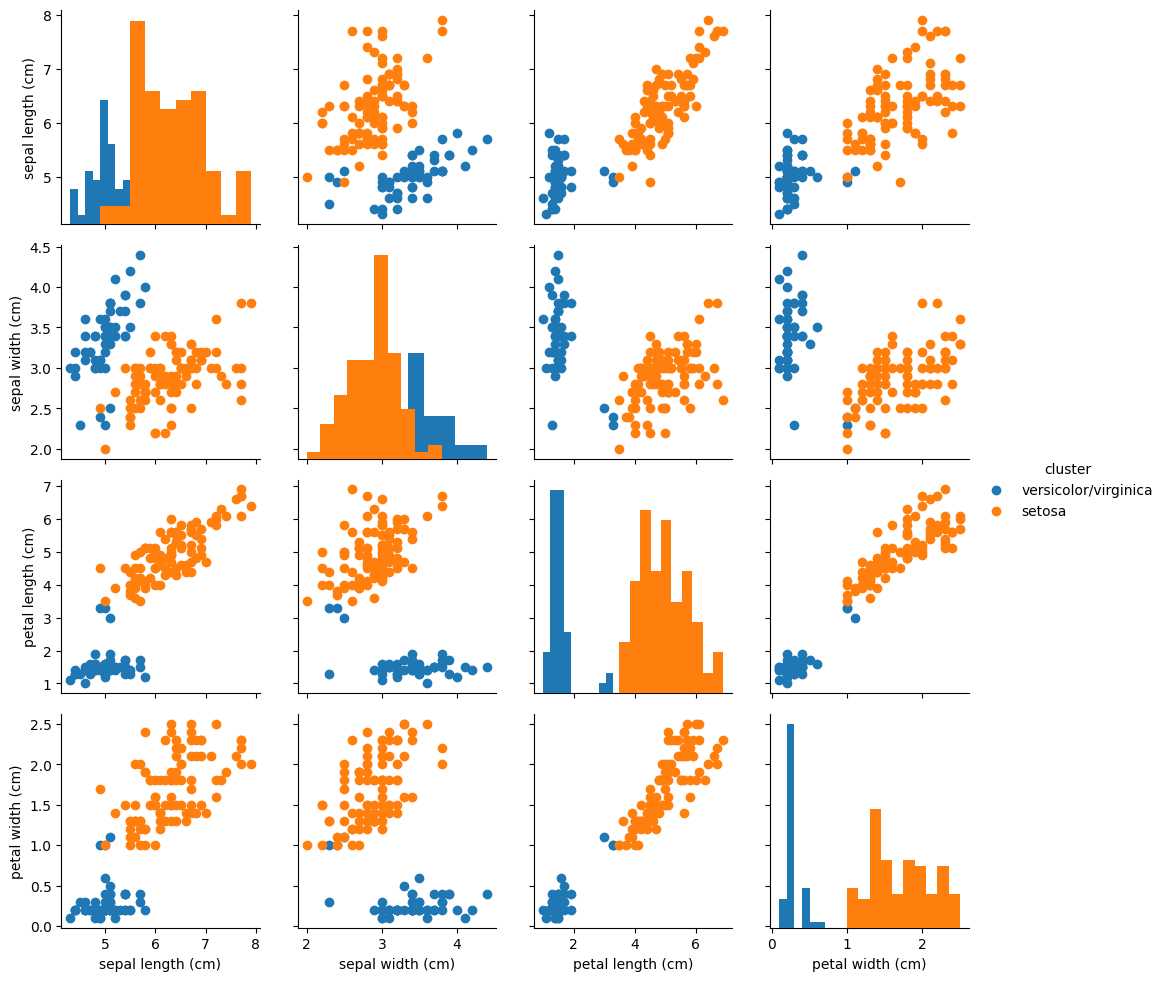

In [ ]:
cluster_mapping = {0: 'setosa', 1: 'versicolor/virginica'}
df_clusters['cluster'] = df_clusters['cluster'].replace(cluster_mapping)

# Pairplot with cluster labels
grid_cluster = sns.PairGrid(df_clusters, hue='cluster', diag_sharey=False)
grid_cluster.map_diag(plt.hist)
grid_cluster.map_offdiag(plt.scatter)
grid_cluster.add_legend()
plt.show()

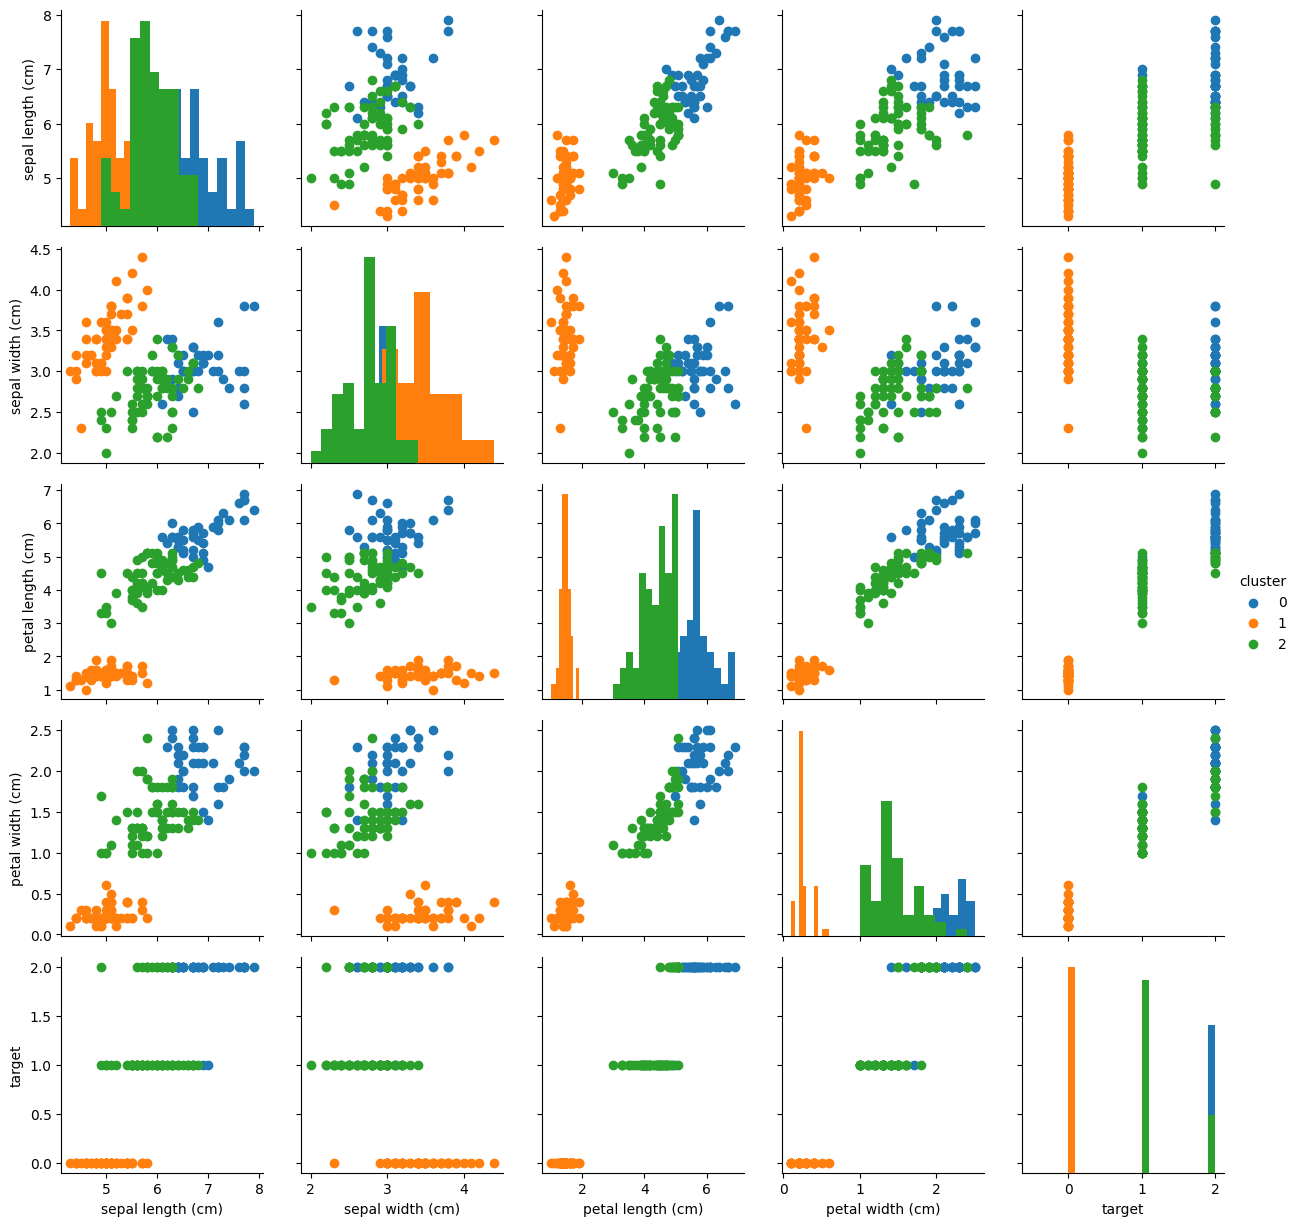

In [ ]:
# Let's try with k = 3
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

df_clusters = df.copy()
df_clusters['cluster'] = labels

# Pairplot with cluster labels
grid_cluster = sns.PairGrid(df_clusters, hue='cluster', diag_sharey=False)
grid_cluster.map_diag(plt.hist)
grid_cluster.map_offdiag(plt.scatter)
grid_cluster.add_legend()
plt.show()

In [ ]:
# Step 7: Implement K-means clustering from scratch (Optional)
# To gain a deeper understanding of the K-means algorithm, we can implement it from scratch using numpy.

def initialize_centroids(X, k):
    """
    Randomly select k data points as initial centroids.
    """
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    return centroids

In [ ]:
def assign_clusters(X, centroids):
    """
    Assign each data point to the nearest centroid.
    """
    distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
    cluster_labels = np.argmin(distances, axis=0)
    return cluster_labels

In [ ]:
def update_centroids(X, cluster_labels, k):
    """
    Update the centroids based on the mean of the data points in each cluster.
    """
    centroids = np.array([X[cluster_labels == i].mean(axis=0) for i in range(k)])
    return centroids

In [ ]:
def kmeans(X, k, max_iter=100, tol=1e-4):
    """
    Perform K-means clustering on the input data X.
    """
    centroids = initialize_centroids(X, k)

    for i in range(max_iter):
        cluster_labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, cluster_labels, k)

        if np.sum(np.abs(new_centroids - centroids)) < tol:
            break

        centroids = new_centroids

    return cluster_labels, centroids

In [ ]:
def kmeans_step_by_step(X, k, max_iter=10):
    centroids = initialize_centroids(X, k)

    plt.figure(figsize=(8, 6))

    for i in range(max_iter):
        cluster_labels = assign_clusters(X, centroids)

        plt.clf()

        for j in range(k):
            cluster_samples = X[cluster_labels == j]
            plt.scatter(cluster_samples[:, 0], cluster_samples[:, 1], label=f'Cluster {j}')

            # Draw lines from centroid to data points in the cluster
            for sample in cluster_samples:
                plt.plot([centroids[j, 0], sample[0]], [centroids[j, 1], sample[1]], 'k-', alpha=0.2)

        plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r', label='Centroids')

        plt.title(f'Iteration {i+1}')
        plt.xlabel('Sepal Length')
        plt.ylabel('Sepal Width')
        plt.legend()

        plt.tight_layout()
        plt.pause(1)  # Pause for 1 second between iterations

        centroids = update_centroids(X, cluster_labels, k)

    plt.show()

    return cluster_labels, centroids

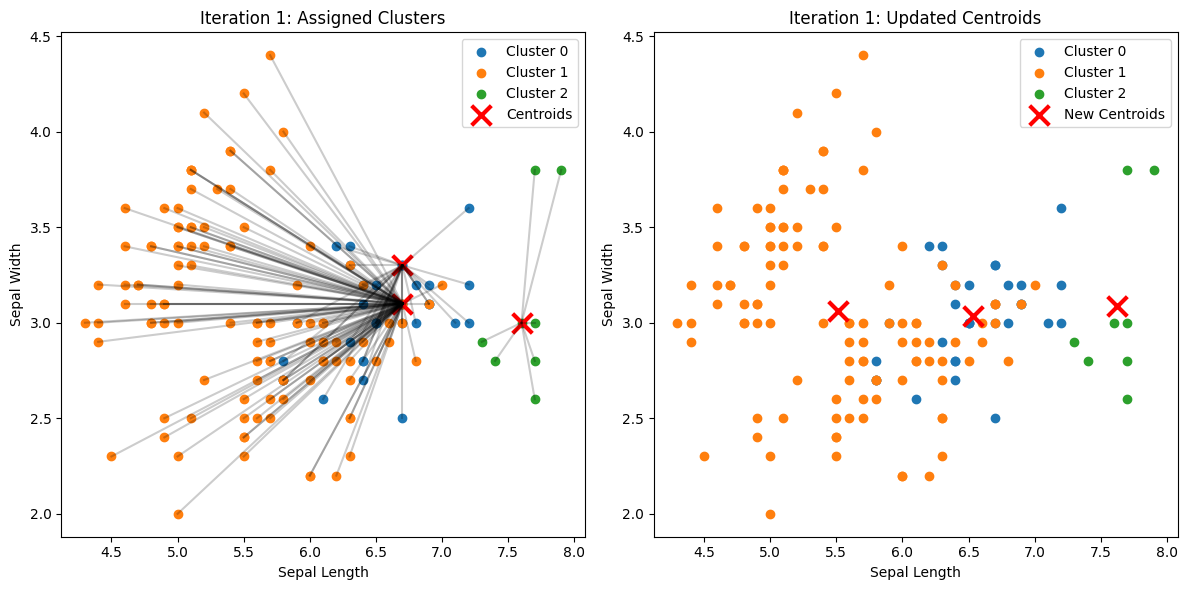

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

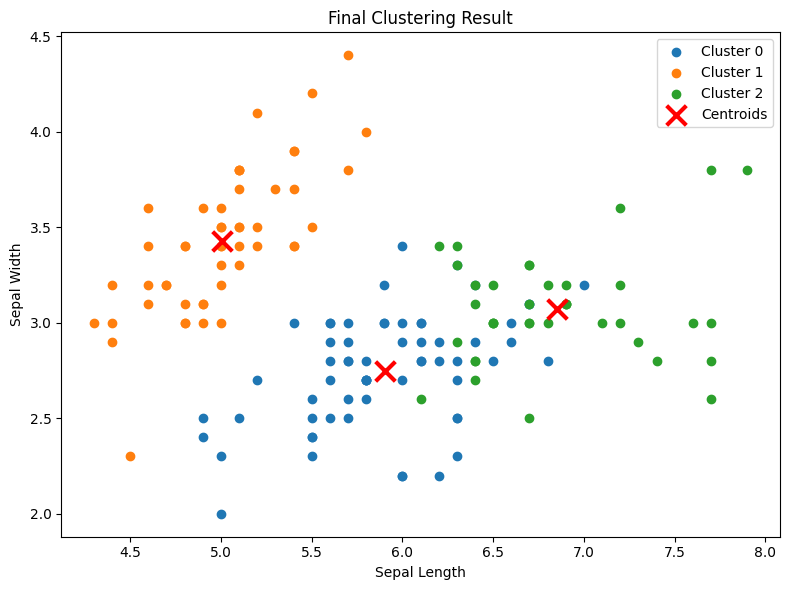

In [ ]:
# Specify the number of clusters (k)
k = 3

# Perform K-means clustering step by step
labels, centroids = kmeans_step_by_step(X, k)

# Plot the final clustering result
plt.figure(figsize=(8, 6))
for j in range(k):
    cluster_samples = X[labels == j]
    plt.scatter(cluster_samples[:, 0], cluster_samples[:, 1], label=f'Cluster {j}')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, linewidths=3, color='r', label='Centroids')
plt.title('Final Clustering Result')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.tight_layout()
plt.show()